In [1]:
from sagemaker import get_execution_role
from sagemaker import Session

role = get_execution_role()
sess = Session()
region = sess.boto_region_name
bucket = sess.default_bucket()

In [2]:
# ref: https://github.com/keras-team/keras/issues/14265
!pip install "h5py==2.10.0"
import h5py
import numpy as np

In [3]:
import os
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import load_model

loaded_model = load_model ('./data/my-model.h5')
print('Already load model')

Using TensorFlow backend.



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Already load model


In [4]:
from tensorflow.python.saved_model import builder
from tensorflow.python.saved_model.signature_def_utils import predict_signature_def
from tensorflow.python.saved_model import tag_constants

model_version = '1'
export_dir = 'export/Servo/' + model_version
# Build the Protocol Buffer SavedModel at 'export_dir'
builder = builder.SavedModelBuilder(export_dir)
# Create prediction signature to be used by TensorFlow Serving Predict API
signature = predict_signature_def(inputs={"inputs": loaded_model.input}, outputs={"score": loaded_model.output})

session = tf.compat.v1.Session()
init_op = tf.compat.v1.global_variables_initializer()
session.run(init_op)
# Save the meta graph and variables
builder.add_meta_graph_and_variables(
    sess=session, tags=[tag_constants.SERVING], signature_def_map={"serving_default": signature})
builder.save()

Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: export/Servo/1/saved_model.pb


b'export/Servo/1/saved_model.pb'

In [5]:
model_path = 'export/Servo/1/'
!saved_model_cli show --all --dir {model_path}



MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['inputs'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, -1, 14)
        name: lstm_1_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['score'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 2)
        name: activation_1/Sigmoid:0
  Method name is: tensorflow/serving/predict


In [6]:
import tarfile
model_archive = 'model.tar.gz'
with tarfile.open(model_archive, mode='w:gz') as archive:
    archive.add('export', recursive=True)
model_data = sess.upload_data(path=model_archive, key_prefix='model')

In [7]:
from sagemaker.tensorflow.serving import TensorFlowModel
instance_type = 'ml.t2.medium' 
tf_framework_version = tf.__version__
sm_model = TensorFlowModel(model_data=model_data, 
framework_version=tf_framework_version,role=role)

In [8]:
%%time
predictor = sm_model.deploy(initial_instance_count=1, instance_type=instance_type)

update_endpoint is a no-op in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


-------------!CPU times: user 291 ms, sys: 24.3 ms, total: 315 ms
Wall time: 6min 31s


In [12]:
import pandas as pd
all_pd = pd.read_csv('./data/123.csv', delimiter=",", skiprows=0)
all_useful_data = all_pd.to_numpy()
veh_id = all_useful_data[:, 0]
all_useful_data[:, 2], all_useful_data[:, 4], all_useful_data[:, 6], all_useful_data[:, 8], all_useful_data[:,
                                                                                            10], all_useful_data[:,
                                                                                                 12], all_useful_data[:,
                                                                                                      14] = all_useful_data[
                                                                                                            :,
                                                                                                            2] / 65, all_useful_data[
                                                                                                                     :,
                                                                                                                     4] / 65, all_useful_data[
                                                                                                                              :,
                                                                                                                              6] / 65, all_useful_data[
                                                                                                                                       :,
                                                                                                                                       8] / 65, all_useful_data[
                                                                                                                                                :,
                                                                                                                                                10] / 65, all_useful_data[
                                                                                                                                                          :,
                                                                                                                                                          12] / 65, all_useful_data[
                                                                                                                                                                    :,
                                                                                                                                                                    14] / 65
all_useful_data[:, 3], all_useful_data[:, 5], all_useful_data[:, 7], all_useful_data[:, 9], all_useful_data[:,
                                                                                            11], all_useful_data[:,
                                                                                                 13], all_useful_data[:,
                                                                                                      15] = all_useful_data[
                                                                                                            :,
                                                                                                            3] / 1650, all_useful_data[
                                                                                                                       :,
                                                                                                                       5] / 1650, all_useful_data[
                                                                                                                                  :,
                                                                                                                                  7] / 1650, all_useful_data[
                                                                                                                                             :,
                                                                                                                                             9] / 1650, all_useful_data[
                                                                                                                                                        :,
                                                                                                                                                        11] / 1650, all_useful_data[
                                                                                                                                                                    :,
                                                                                                                                                                    13] / 1650, all_useful_data[
                                                                                                                                                                                :,
                                                                                                                                                                                15] / 1650
short_veh_id = list(set(list(veh_id)))
short_veh_id.sort()
all_input = []
print("Experiment starts")
for i in range(int(all_useful_data.shape[0] * 0.75) - 2 * 80):
    if all_useful_data[i, 0] == all_useful_data[i + 79, 0] and all_useful_data[i + 79, 1] - all_useful_data[
        i, 1] == 79 and all_useful_data[i + 79, 0] == all_useful_data[i + 158, 0] and all_useful_data[i + 158, 1] - \
            all_useful_data[i + 79, 1] == 79:
        no_use = all_useful_data[i + 80:i + 2 * 80]
        no_use = np.array(no_use)
        the_output = no_use[:, :]
        all_together = np.hstack((all_useful_data[i: i + 80][:, :], the_output))
        all_input.append(all_together)
print("Data processing over")
all_input = np.array(all_input)

x_test_id = all_input[:, :, 0:2]
x_test = all_input[:, :, 2:16]
y_test_id = all_input[:, 0, 16:18]
y_test = all_input[:, 0, 18:20]
y_test_environ = all_input[:, 0, 20:]

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 14))
y_test = np.reshape(y_test, (y_test.shape[0], 2))

# x_test = np.reshape(x_test,(1, 80, 14))

Experiment starts
Data processing over


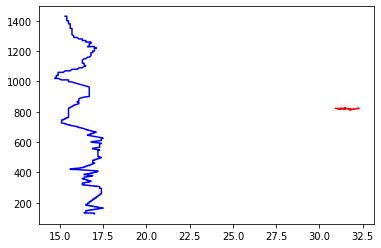

In [37]:
# %%time
from matplotlib import pyplot as plt
# print(y_test_id[:, 0])
test_veh_id = list(set(list(y_test_id[:, 0])))
test_veh_id.sort()
# print(test_veh_id)
for i in test_veh_id:
#     print(i)
    same_veh = np.where(y_test_id[:, 0] == i)
    same_veh_input = x_test[same_veh]
    same_veh_truth = y_test[same_veh]
    x_tru = [x[0]*65 for x in same_veh_truth]
    y_tru = [x[1]*1650 for x in same_veh_truth]
    prediction = predictor.predict({'inputs': same_veh_input})
    all_prediction = np.array(prediction['outputs'])
    x_pre = [x[0]*65 for x in prediction['outputs']]
    y_pre = [x[1]*1650 for x in prediction['outputs']]
    plt.figure()
    plt.plot(x_pre, y_pre, 'r')
    plt.plot(x_tru, y_tru, 'b')
#     print(x_pre, y_pre)
    plt.show()

In [ ]:
predictor.delete_endpoint()